<center> <font size = '4'> <b>Hello World of Deep Learning</b> </font></center>

In this tutorial, we use deep learning techniques to learn the parameters of a quadratic function. We will use a mean squared error as the loss function and use backpropagation to find the best fitting parameters of the model. We will do this using three methods.

1) <a href = '#section1'> Numpy </a>

2) <a href = '#section2'> Tensorflow functional api </a>

<a id = 'section1'></a>

<b> Numpy </b>

In [20]:
#first import required libraries
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import set_matplotlib_formats
from mpl_toolkits.mplot3d import Axes3D
set_matplotlib_formats('retina')

In [21]:
#build the model class
class Model():
    
    def __init__(self):
        
        #assign the initial variables
        self.a = 15
        self.b = -2
        self.c = 10
        
    def __call__(self, x):
        
        return self.a * (x)**2 + self.b * x + self.c

#initialize the model
model = Model()

#print the initial parameter values
print('Initial parameter "a" value: ', model.a)
print('Initial parameter "b" value: ', model.b)
print('Initial parameter "c" value: ', model.c)

Initial parameter "a" value:  15
Initial parameter "b" value:  -2
Initial parameter "c" value:  10


Now let's synthesize data. We will use parameters 10, 5 and 12 for a, b and c respectively. We will use the quadratic function $a x^2 + b x + c$ to synthesize data.

In [22]:
#synthasize data
true_a = 10
true_b = 5
true_c = 12

#number of examples
num_examples = 1000

#create x and y data
x = np.random.normal(0, 1, num_examples)
y = true_a * np.square(x) + true_b * x + true_c

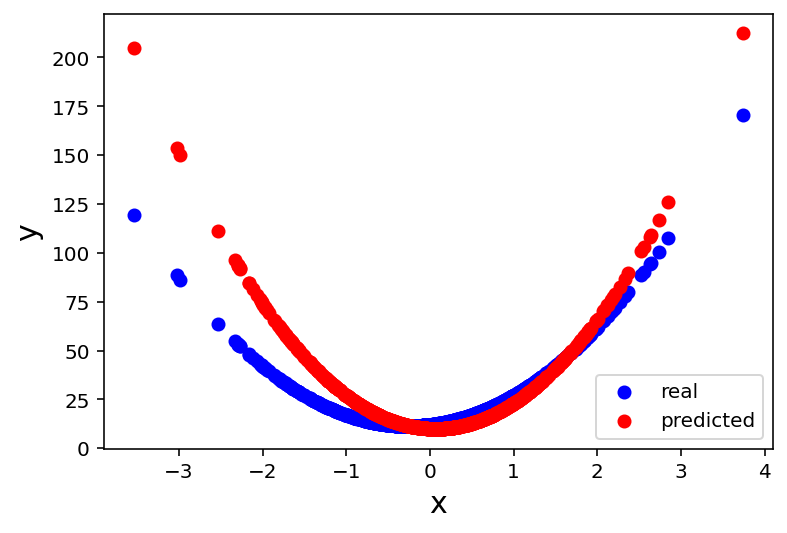

In [23]:
#create function to plot data
def plot_data(inputs, outputs, predictions, figsize = None):
    
    if figsize:
        plt.figure(figsize = figsize) 
    
    plt.scatter(inputs, outputs, color = 'b')
    plt.scatter(inputs, predictions, color = 'r')
    plt.legend(['real', 'predicted'])
    plt.xlabel('x', fontsize = '15')
    plt.ylabel('y', fontsize = '15')
    plt.show()
    
#plot the current data
plot_data(x, y, model(x))

In the plot the blue dots represent the true data. These true data is generated by the function $10x^2 + 5x + 12$. The red dots are coming from another quadratic function with different parameters. ($ax^2 + bx + c$ where a, b and c are randomly initialized as 15, -2 and 10). The goal is to use deep learning to fit the randomly initialized data (red dots) to the true data (blue dots). In order to do this we will have to use a method that gets our parameter values a, b and c as close as possible to 10, 5 and 12. Let's see how we can do this by deep learning. (Note that quadratic equations have a closed form solution and we don't have to use deep learning to find solutions.)


<u> Gradient descent to calculate the gradients </u> 

The goal in deep learning is to learn the parameters (a, b and c in this case) of the model to predict the real values. We do this by initializing the parameters as random values and comparing the predictions to the real values. The function that compares the predicted values to the real values, is called the loss function. There are multiple different loss functions, but in this example we use the "mean squared error (mse)" loss function. The mse can be calculated by the following formula. 

<font size = '4'> $ L(\hat{y}, y) = \frac{1}{n} \sum_1^n{(\hat{y} - y)^2} $ </font> where,

$n$ - number of examples

$\hat{y}$ - Predicted output (given by $ax^2 + bx + c$)

$y$ - True output

The goal is to find the paramters that minimize the loss function. In other words, find a, b and c values that makes the predicted output as close as possible to the true output. In order to find the best paramters for a, b and c we use a optimization technique called gradient descent. 
<br> <br>

<div>
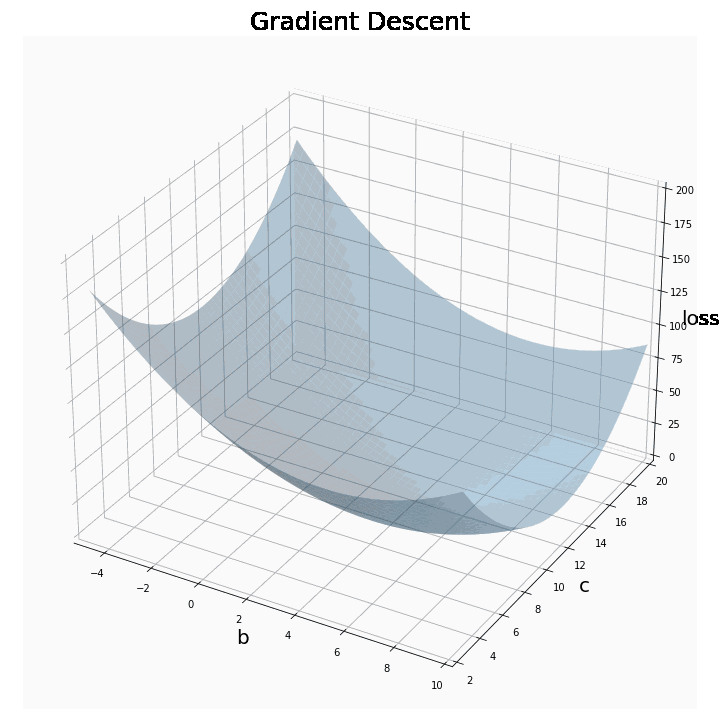
</div>

In the figure above, you can see an example of gradient descent. The z axis of the plot represents the loss, y axis represents the c paramter and the x axis represents the b parameter. (note that we are not able to plot all three parameters with the loss). The blue surface represents loss values given different b and c values. (note that the true value for "a" was used for illustration purposes). If you look at the loss function you can see that there is a point where the loss is a minimum. (where the red dots end up stopping). The goal of gradient descent is to find this minimum. We can acheive this minimum value by finding the relationships between the loss function and the parameters and then updating the our current estimates of the parameters until we reach the best values. 

First let's find the derivatives of the parameters w.r.t the loss function.

We can use the chain rule of calculus to find the derivative of the loss function w.r.t each parameter.

<font size = '4'> $\frac{dL}{da} = \frac{dL}{d\hat{y}} . \frac{d\hat{y}}{da}$ --> 1
    
$\frac{dL}{db} = \frac{dL}{d\hat{y}} . \frac{d\hat{y}}{db}$ --> 2
    
$\frac{dL}{dc} = \frac{dL}{d\hat{y}} . \frac{d\hat{y}}{dc}$ --> 3 </font>


Now if we find $\frac{dL}{d\hat{y}}$ and $\frac{d\hat{y}}{da}, \frac{d\hat{y}}{db}, \frac{d\hat{y}}{dc}$ we can find the relationships between each paramter and the loss function. Below are these derivatives.

<font size = '4'> $\frac{dL}{d\hat{y}} = \frac{1}{n} \sum_1^n{2 (\hat{y} - y)}$
    
    
$\frac{d\hat{y}}{da} = x^2$ </font>  (We calculate this by finding the derivative of $ax^2 + bx + c$ w.r.t a)
    
<font size = '4'> $\frac{d\hat{y}}{db} = x $ </font>  (We calculate this by finding the derivative of $ax^2 + bx + c$ w.r.t b)
    
    
<font size = '4'> $\frac{d\hat{y}}{dc} = 1 $ </font>   (We calculate this by finding the derivative of $ax^2 + bx + c$ w.r.t c)
    

Now let's substitute the equations above to equations 1, 2 and 3 and we get the derivatives of the parameters w.r.t the loss function.


$\frac{dL}{da} = \frac{1}{n} . \sum_1^n{2 (\hat{y} - y)} . x^2$  
    
$\frac{dL}{db} = \frac{1}{n} . \sum_1^n{2 (\hat{y} - y)} . x$
    
    
$\frac{dL}{dc} = \frac{1}{n} . \sum_1^n{2 (\hat{y} - y)}$ </font>

The goal for us is to find the minimum of the loss function. So the derivatives of the parameters gives us the direction we should go in order to get to this minimum. So we have to subtract this derivative value from our current estimate. Before subtracting, we first multiply the derivative by a constant value, which is called the learning rate. This learning rate ($\alpha$) is a hyperparameter which we can change to make our algorithm run faster. We can update our parameters with the three equations below.

$ a = a - \alpha . \frac{dL}{da}$

$ b = b - \alpha . \frac{dL}{db}$

$ c = c - \alpha . \frac{dL}{dc}$

Now let's do these calculations.

In [24]:
#create a loss function. will use mean squared error
def loss(y_predicted, y_true):
    
    return np.mean(np.square(y_predicted - y_true))

#let's use backpropagation to calculate the loss
def grads(inputs, outputs, predictions):
    
    #calculate dL/da (calling it da)
    da = np.dot(np.square(inputs).T, 2 * (predictions - outputs))
    da = da/len(inputs)
    
    #calculate dL/db (calling it db)
    db = np.dot(inputs.T, 2*(predictions - outputs))
    db = db/len(inputs)
    
    #calculate dL/dc (calling it dc)
    dc = np.sum(predictions - outputs)
    dc = dc/len(inputs)
    
    return da, db, dc
    

In [25]:
#now let's create a function that fits the model given the model paramters, inputs and outputs to the data

def fit(model, inputs, outputs, learning_rate):
    
    #calculate the current loss using the loss function
    current_loss = loss(outputs, model(inputs))
    
    #calculate the gradients for each variable in the model
    da, db, dc = grads(inputs, outputs, model(inputs))
    
    #update the parameters of the model
    model.a = model.a - learning_rate * da
    model.b = model.b - learning_rate * db
    model.c = model.c - learning_rate * dc
    
    return current_loss  

Now let's fit the model and see how gradient descent is estimating the model.

epoch 0 --------> mean squared error 92.1445
Real and predicted values after epoch 0


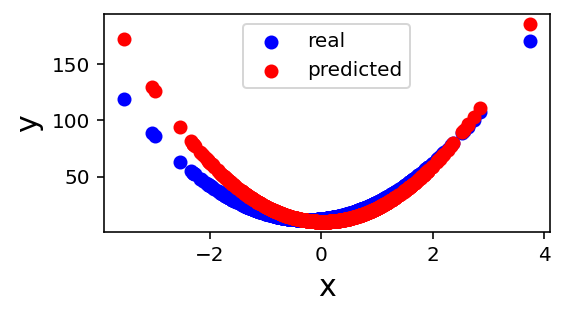

epoch 5 --------> mean squared error 8.9862
Real and predicted values after epoch 5


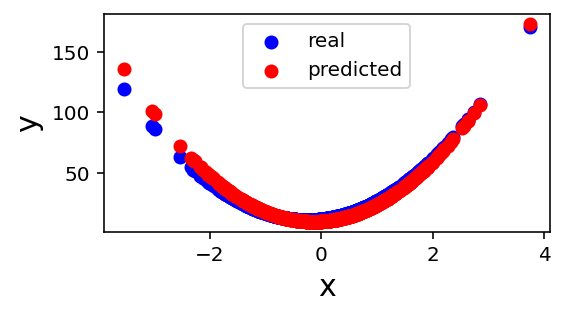

epoch 10 --------> mean squared error 2.2103
Real and predicted values after epoch 10


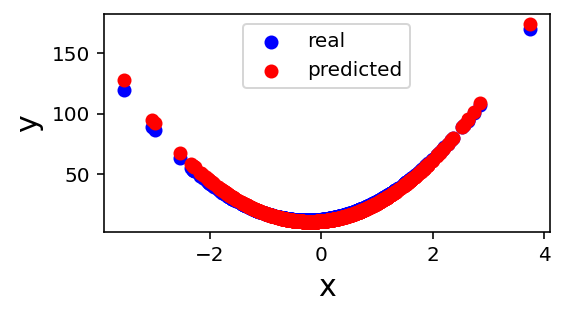

epoch 15 --------> mean squared error 0.8276
Real and predicted values after epoch 15


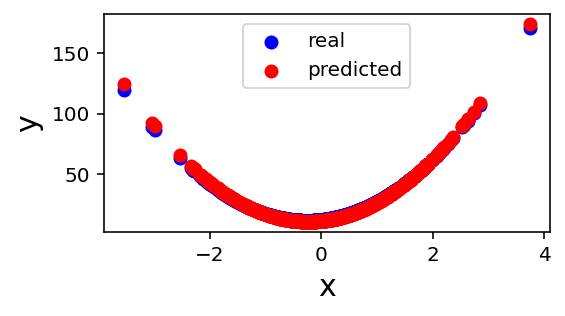

epoch 20 --------> mean squared error 0.3869
Real and predicted values after epoch 20


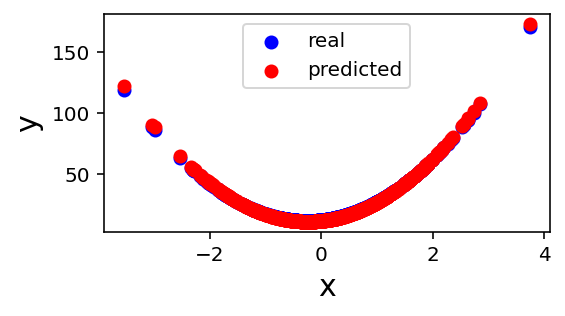

epoch 25 --------> mean squared error 0.1946
Real and predicted values after epoch 25


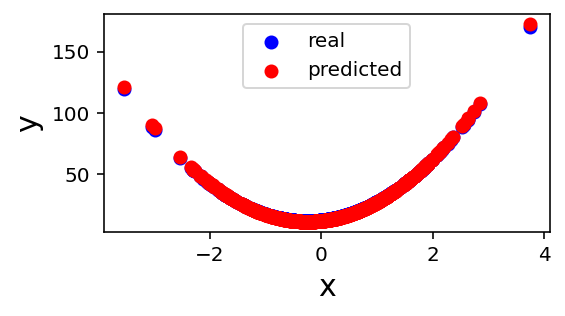

epoch 30 --------> mean squared error 0.0999
Real and predicted values after epoch 30


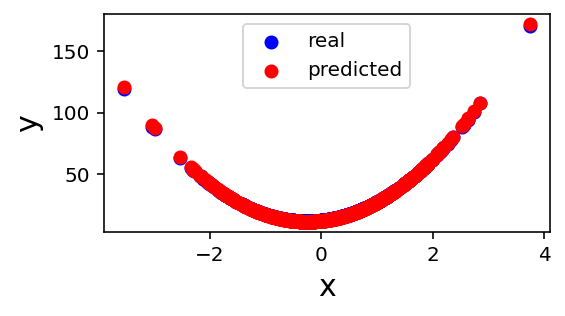

epoch 35 --------> mean squared error 0.0515
Real and predicted values after epoch 35


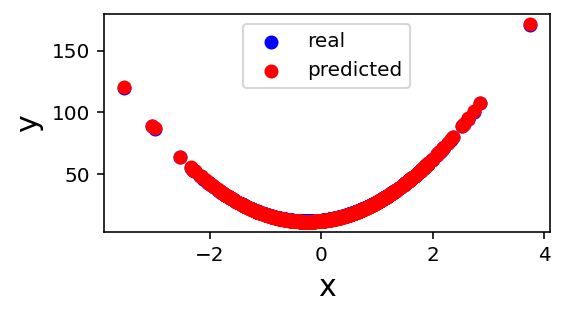

epoch 40 --------> mean squared error 0.0266
Real and predicted values after epoch 40


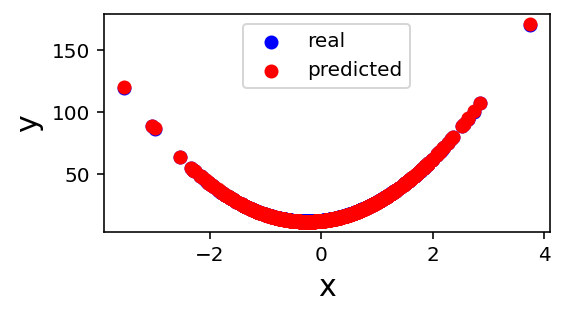

epoch 45 --------> mean squared error 0.0137
Real and predicted values after epoch 45


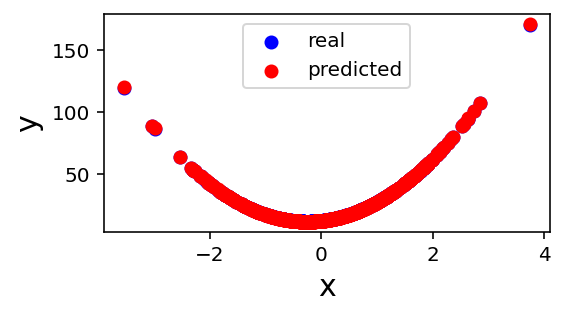

True "a": 10  Learned "a": 10.04
True "a": 5  Learned "a": 5.0
True "a": 12  Learned "a": 11.9


In [26]:
#train the model for 50 epochs

#initialize the model
model = Model()

#number of epochs
epochs = 50

#get a b c and losses
list_a, list_b, list_c = [], [], []
losses = []

#train the model 
for epoch in range(epochs):
    
    list_a.append(model.a)
    list_b.append(model.b)
    list_c.append(model.c)
        
    current_loss = fit(model, x, y, 0.1)
    losses.append(current_loss)
    
    if epoch % 5 == 0:
        
        print('epoch {} --------> mean squared error {}'.format(epoch, np.round(current_loss, 4)))
        print('Real and predicted values after epoch {}'.format(epoch))
        plot_data(x, y, model(x), figsize = (4, 2))
        

#print the final parameter values
print('True "a": {}  Learned "a": {}'.format(true_a, np.round(model.a, 2)))
print('True "a": {}  Learned "a": {}'.format(true_b, np.round(model.b, 2)))
print('True "a": {}  Learned "a": {}'.format(true_c, np.round(model.c, 2)))


We can see that after about 30 epochs the red dots are almost identical to the blue dots. So the model has learnt the parameters as expected. Now let's plot and see what happens to the loss function after each epoch.

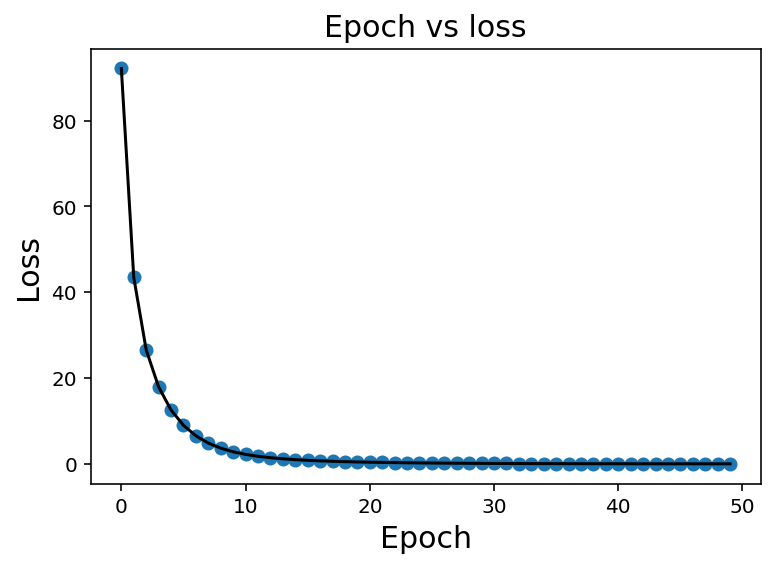

In [29]:
#lets see how the loss is going down with epochs
plt.plot(range(epochs), losses, 'k')
plt.scatter(range(epochs), losses)
plt.title('Epoch vs loss', fontsize = 15)
plt.xlabel('Epoch', fontsize = 15)
plt.ylabel('Loss', fontsize = 15)
plt.show()

The loss decreases when when the epoch increases. This means that the difference between the estimated values of by the model is very close to the actual values. So the model is learning in each epoch and predicting more accurately. Next we will see how the parameters change with epochs. We will see that the parameters start from the initial value and then starts to get closer and closer to the actual value when the epoch number increases.

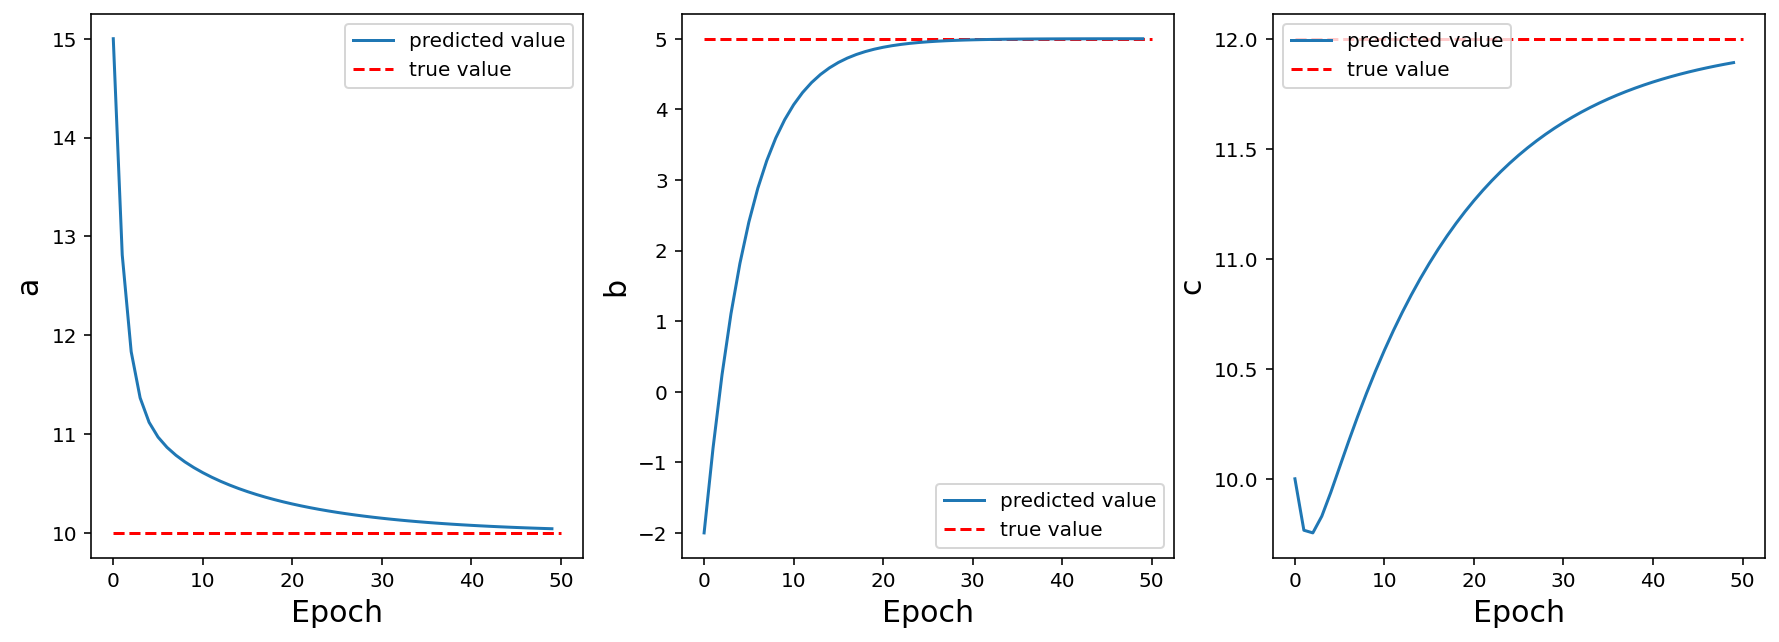

In [28]:
#loss vs parameters
fig, ax = plt.subplots(1, 3, figsize = (15, 5))
i = 0

for lis in [(list_a, true_a, 'a'), (list_b, true_b, 'b'), (list_c, true_c, 'c')]:
    
    ax[i].plot(range(epochs), lis[0])
    ax[i].hlines(lis[1], 0, 50, linestyle = '--', color = 'r')
    ax[i].set_xlabel('Epoch', fontsize = 15)
    ax[i].set_ylabel(lis[2], fontsize = 15)
    ax[i].legend(['predicted value', 'true value'])
    i += 1

Finally let's see how the parameters change with the loss.

In [17]:
#visualizing the loss function and how parameter values change
b_vals = np.linspace(-5, 10, 1000)
c_vals = np.linspace( 3, 20, 1000)

#create meshgrid for b_vals and c_vals we will be plotting only these two vs the loss
b_vals, c_vals = np.meshgrid(b_vals, c_vals)

#create a function to append loss values
loss_vals = np.zeros([1000, 1000])

#initialize the model
model1 = Model()

for i in range(len(b_vals)):
    
    
    for k in range(len(b_vals)):
        
        model1.a = true_a
        model1.b = b_vals[i][k]
        model1.c = c_vals[i][k]
    
        #calculate loss for that value    
        loss = np.mean(np.square(model1(x) - y))
        loss_vals[i][k] = loss


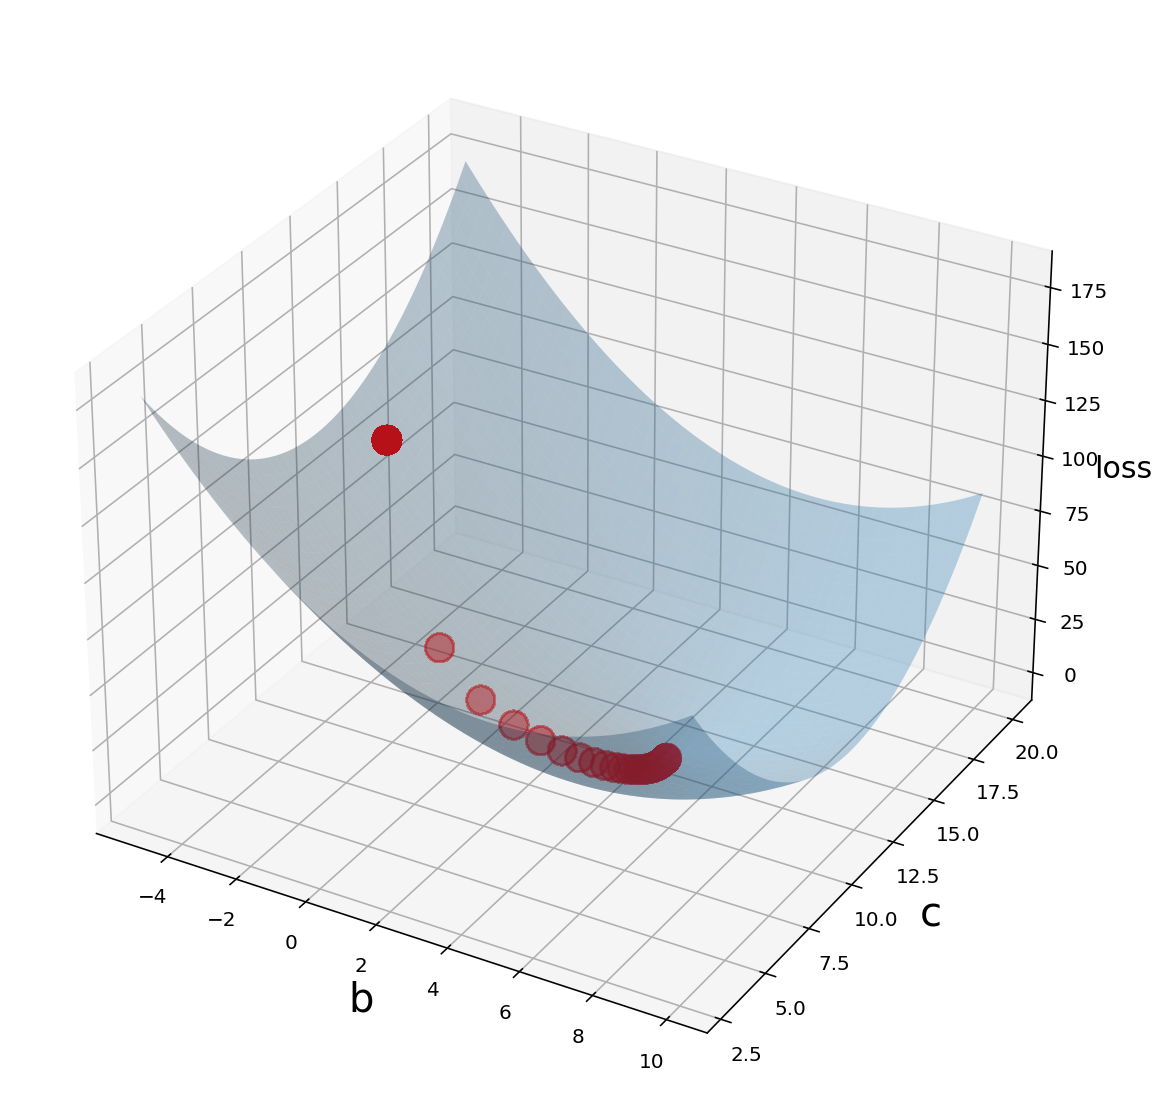

In [18]:
#plot 3d
fig = plt.figure(figsize = (10, 10))
#ax = plt.subplots(subplot_kw = {"projection": "3d"}, figsize = (10, 10))
ax = plt.subplot(111, projection = '3d')

surf = ax.plot_surface(b_vals, c_vals, loss_vals, alpha = 0.3)
ax.set_ylabel('c', fontsize = 20)
ax.set_xlabel('b', fontsize = 20)
ax.set_zlabel('loss', fontsize = 15)
ax.scatter(list_b, list_c, losses, antialiased=False, s = 200, color = 'r')
plt.show()

Like explained earlier, we can see that the red dots are rolling down towards the minimum loss value. 

<a id = 'section2'> </a> <b>Tensorflow Functional API</b>

In this section, I repeat the same process using the tensorflow functional API. 

In [43]:
#first import the libraries
import tensorflow as tf


In [44]:
#build the model

class Model():
    def __init__(self):
        self.a = tf.Variable(5.0)
        self.b = tf.Variable(2.0)
        self.c = tf.Variable(0.0)
    
    def __call__(self, x):

        return self.a * tf.square(x) + self.b * x + self.c 

#initialize the model
model = Model() 

In [45]:
#synthesize data
true_a = 3
true_b = 1
true_c = 4

num_examples = 1000

x = tf.random.normal(shape = [num_examples])

y = true_a * tf.square(x) + true_b * x + true_c

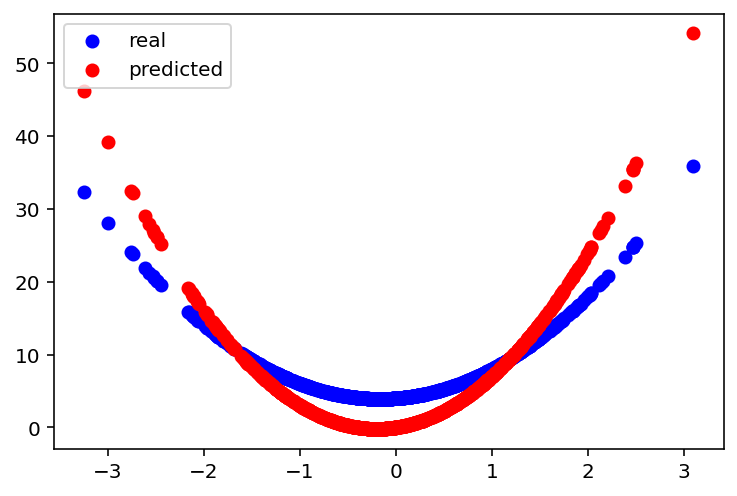

In [46]:
def plot_data(inputs, outputs, predicted):
    plt.scatter(inputs, outputs, color = 'b')
    plt.scatter(inputs, predicted, color = 'r')
    plt.legend(['real', 'predicted'])
    plt.show()
    
plot_data(x, y, model(x))

In [47]:
#create loss function
def loss(y_predicted, y_true):
    
    return tf.reduce_mean(tf.square(y_predicted - y_true))

In [48]:
#trainin loop 
def train(model, inputs, outputs, learning_rate):
    
    with tf.GradientTape() as t:
        
        current_loss = loss(outputs, model(inputs)) #calculate the loss

    da, db, dc = t.gradient(current_loss, [model.a, model.b, model.c]) #calculate the gradients of the params w.r.t the loss
    
    #update the parameters
    model.a.assign_sub(learning_rate * da)
    model.b.assign_sub(learning_rate * db)
    model.c.assign_sub(learning_rate * dc)
    
    return current_loss

In [54]:
#initialize the model
model = Model()

#train the model 
list_a, list_b, list_c = [], [], []

epochs = range(15)
losses = []

for epoch in epochs:
    #append values of w and b from the model
    list_a.append(model.a.numpy())
    list_b.append(model.b.numpy())
    list_c.append(model.c.numpy())

    current_loss = train(model, x, y, learning_rate = 0.1)
    losses.append(current_loss)
    print('Epoch', epoch, '  loss: ', current_loss.numpy())

Epoch 0   loss:  12.020308
Epoch 1   loss:  9.401645
Epoch 2   loss:  7.3647623
Epoch 3   loss:  5.773959
Epoch 4   loss:  4.5295234
Epoch 5   loss:  3.5550594
Epoch 6   loss:  2.7914019
Epoch 7   loss:  2.1925576
Epoch 8   loss:  1.7226987
Epoch 9   loss:  1.3538715
Epoch 10   loss:  1.0642374
Epoch 11   loss:  0.8367158
Epoch 12   loss:  0.65793645
Epoch 13   loss:  0.5174232
Epoch 14   loss:  0.40696356


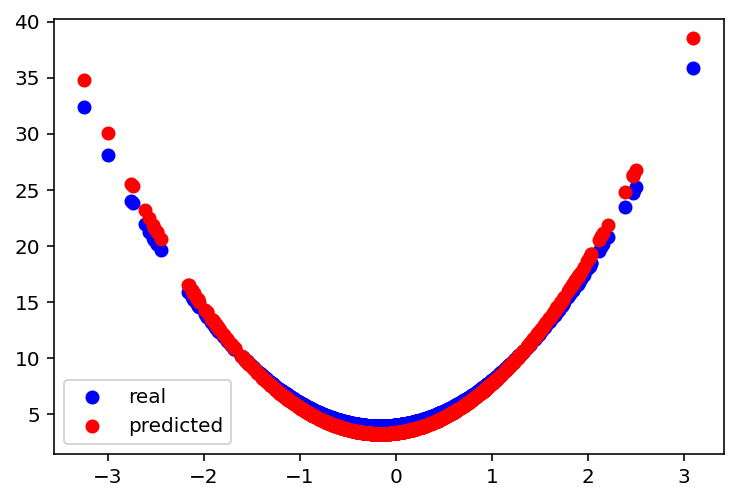

In [55]:
#now let's plot the model to see the results
plot_data(x, y, model(x))